# STOCK MARKET ANALYSIS

**Company Stock Recommendation System for New Investor based on daily Stock movement using Kmeans Clustering and DBSCAN.**<br>

**Extracting live Stock Market data from yahoo finance.Finding similarities amongst various companies using their stock market prices and then cluster them into different clusters using the various algorithem like K-Means etc.**

## Table of Content

1. **[Import Libraries](#lib)**
2. **[Data Preparation](#prep)**
    - 2.1 - **[Read the Data](#read)**
    - 2.2 - **[Check the Data Type](#dtype)**
    - 2.3 - **[Missing Value Treatment](#null)**
3. **[Stock Analysis](#SA)**
    - 3.1 - **[Compare the OPEN prices for different companies](#c1)**
    - 3.2 - **[Date-wise movement of stocks of a particular company](#c2)**
    - 3.3 - **[Volume vs Date for a particular company](#c3)**
    - 3.4 - **[Comparison between movements of any four companies](#c4)**
4. **[Cluster Analysis](#cluster)**
    - 4.1 - **[Clustering based on daily growth basis i.e movement](#cl1)**
    - 4.2 - **[ K-Means Clustering Validation](#kmeansval)**
         - 4.2.1 - **[Elbow Plot](#elbow)**
         - 4.2.2 - **[ silhouette score for Different Clusters](#silhouette)**
    - 4.3 - **[ KMeans Clustering with 3 Clusters](#kmeans)**
5. **[Clusters profiling](#cp)**
    - 5.1 - **[Cluster-0](#cp2)**
    - 5.2 - **[Cluster-1](#cp3)**
    - 5.3 - **[Cluster-2](#cp4)**
    
6. **[DBSCAN (Density-Based Spatial Clustering of Applications with Noise)](#dbscan)**
7. **[Recommendation Based on Cluster Analysis](#rec)**

<a id="lib"></a>
# 1. Import Libraries

In [4]:
from pandas_datareader import data 
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import numpy as np
import plotly.graph_objects as go

from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import warnings
warnings.simplefilter("ignore")

<a id="prep"></a>
# 2. Data Preparation

#### A dictionary ‘companies_dict’ is defined where ‘key’ is company’s name and ‘value’ is company’s stock code. 28 companies are considered.

In [5]:
companies_dict = {
    'Bharti Airtel Limited':'BHARTIARTL.BO',
    'Reliance Communications Limited':'RCOM.BO',
    'Vodafone Idea Limited':'IDEA.BO',
    'Mahanagar Telephone Nigam Limited':'MTNL.BO',
    'Tata Communications Limited':'TATACOMM.BO',
    'Vindhya Telelinks Limited':'VINDHYATEL.BO',
    'CMI Limited':'CMI.BO',
    'ITI Limited':'ITI.BO',
    'OnMobile Global Limited':'ONMOBILE.BO',
    'HFCL Limited':'HFCL.BO',
    'Aksh Optifibre Limited':'AKSHOPTFBR.BO',
    'GTL Infrastructure Limited':'GTLINFRA.BO',
    'Tata Teleservices (Maharashtra) Limited':'TTML.BO',
    'AGI Infra Limited':'AGIIL.BO',
    'Vodafone Idea Limited':'IDEA.BO',
    'Bigbloc Construction Limited':'BIGBLOC.BO',
    'BSEL Infrastructure Realty Limited':'BSELINFRA.BO',
    'Crane Infrastructure Limited':'CRANEINFRA.BO',
    'Entasis Therapeutics Holdings Inc.':'ETTX',
    'HB Estate Developers Limited':'HBESD.BO',
    'KCL Infra Projects Limited':'KCLINFRA.BO',
    'Maruti Infrastructure Limited':'MAINFRA.BO',
    'Supreme Holdings & Hospitality (India) Limited':'SUPREME.BO',
    'TCI Developers Limited':'TCIDEVELOP.BO',
    'Vas Infrastructure Limited':'VASINFRA.BO',
    'Adani Power Limited':'ADANIPOWER.BO',
    'Adani Transmission Limited':'ADANITRANS.BO',
    'CESC Limited':'CESC.BO',
    'Gita Renewable Energy Limited':'GITARENEW.BO',
    'IDEX Corporation':'IEX',
    'Indowind Energy Limited':'INDOWIND.BO',
    'JSW Energy Limited':'JSWENERGY.NS',
    'Karma Energy Limited':'KARMAENG.NS',
    'NHPC Limited':'NHPC.BO',
    'NLC India Limited':'NLCINDIA.NS',
    'NTPC Limited':'NTPC.NS',
    'Orient Green Power Company Limited':'GREENPOWER.NS',
    'PTC India Financial Services Limited':'PFS.NS',
    'Power Grid Corporation of India Limited':'POWERGRID.NS',
    'Reliance Power Limited':'RPOWER.NS',
    'ACC Limited':'ACC.BO',
    'Ambuja Cements Limited':'AMBUJACEM.NS',
    'Andhra Cements Limited':'ANDHRACEMT.NS',
    'Burnpur Cement Limited':'BURNPUR.NS',
    'Deccan Cements Limited':'DECCANCE.BO',
    'Everest Industries Limited':'EVERESTIND.BO',
    'J K Cement Limited':'JKCEMENT.BO',
    'JK Lakshmi Cement Limited':'JKLAKSHMI.BO',
    'The KCP Limited':'KCP.NS',
    'NCL Industries Limited':'NCLIND.BO',
    'Orient Cement Limited':'ORIENTCEM.BO',
    'The Ramco Cements Limited':'RAMCOCEM.BO',
    'Star Cement Limited':'STARCEMENT.BO',
    'Udaipur Cement Works Limited':'UDAICEMENT.BO',
    'UltraTech Cement Limited':'ULTRACEMCO.BO'}

In [6]:
len(companies_dict)

54

<a id="read"></a>
## 2.1 Read The Data

#### Web extract data (Web Scraping) from yahoo finance into a pandas DataFrame

In [22]:
data_source = 'yahoo'
start_date = '2020-01-01'
end_date = '2021-04-23'
df = data.DataReader(list(companies_dict.values()),
data_source,start_date,end_date)

In [23]:
df.head()

Attributes     Adj Close                                                    \
Symbols    BHARTIARTL.BO RCOM.BO IDEA.BO MTNL.BO TATACOMM.BO VINDHYATEL.BO   
Date                                                                         
2019-12-31           NaN     NaN     NaN     NaN         NaN           NaN   
2020-01-01    451.677734    0.87    6.11    9.45  396.643951    938.967529   
2020-01-02    453.371643    0.89    6.11    9.43  403.065552    941.827576   
2020-01-03    453.371643    0.85    6.12    9.90  418.098999    927.922058   
2020-01-06    447.891327    0.84    6.02   10.00  412.971680    887.438232   

Attributes                                               ...        Volume  \
Symbols        CMI.BO     ITI.BO ONMOBILE.BO    HFCL.BO  ... EVERESTIND.BO   
Date                                                     ...                 
2019-12-31        NaN        NaN         NaN        NaN  ...           NaN   
2020-01-01  47.467934  91.900002   29.600260  17.450001  ...        1195.0   
2020-01-02  49.491001  95.750000   30.617619  17.900000  ...       30089.0   
2020-01-03  49.194939  94.800003   30.084715  17.750000  ...       24548.0   
2020-01-06  46.925163  91.650002   28.728239  17.250000  ...       16637.0   

Attributes                                                            \
Symbols    JKCEMENT.BO JKLAKSHMI.BO    KCP.NS NCLIND.BO ORIENTCEM.BO   
Date                                                                   
2019-12-31         NaN          NaN       NaN       NaN          NaN   
2020-01-01       882.0       2026.0   57086.0  102205.0       1704.0   
2020-01-02      4256.0      15010.0  271252.0   12345.0      15920.0   
2020-01-03      7663.0      42199.0   40933.0   13793.0       6095.0   
2020-01-06      3562.0      11911.0   35026.0    1931.0       1278.0   

Attributes                                                        
Symbols    RAMCOCEM.BO STARCEMENT.BO UDAICEMENT.BO ULTRACEMCO.BO  
Date                                                              
2019-12-31         NaN           NaN           NaN           NaN  
2020-01-01      1150.0        1558.0       24239.0        5668.0  
2020-01-02     17949.0       17311.0      189840.0       51139.0  
2020-01-03      5096.0        4643.0      221418.0       15345.0  
2020-01-06      9085.0        4085.0       81263.0       21059.0  

[5 rows x 324 columns]

#### Check the shape of the data

In [24]:
df.shape

(340, 324)

**Interpretation:** There are total 324 features like - **Ajd Close**, **Close**, **High**, **Low**, **Open**, **Volume**. and rows representing
340 days of stock market data of all 54 companies from given start date to end date.

<a id="dtype"></a>
### 2.2 Check the Data Type

In [25]:
df.dtypes

Attributes  Symbols      
Adj Close   BHARTIARTL.BO    float64
            RCOM.BO          float64
            IDEA.BO          float64
            MTNL.BO          float64
            TATACOMM.BO      float64
                              ...   
Volume      ORIENTCEM.BO     float64
            RAMCOCEM.BO      float64
            STARCEMENT.BO    float64
            UDAICEMENT.BO    float64
            ULTRACEMCO.BO    float64
Length: 324, dtype: object

<a id="null"></a>
### 2.3 Missing Value Treatment

In [26]:
df.isna().sum()

Attributes  Symbols      
Adj Close   BHARTIARTL.BO    15
            RCOM.BO          15
            IDEA.BO          15
            MTNL.BO          15
            TATACOMM.BO      15
                             ..
Volume      ORIENTCEM.BO     15
            RAMCOCEM.BO      15
            STARCEMENT.BO    15
            UDAICEMENT.BO    15
            ULTRACEMCO.BO    15
Length: 324, dtype: int64

In [27]:
df=df.dropna()

In [28]:
df.isna().sum()

Attributes  Symbols      
Adj Close   BHARTIARTL.BO    0
            RCOM.BO          0
            IDEA.BO          0
            MTNL.BO          0
            TATACOMM.BO      0
                            ..
Volume      ORIENTCEM.BO     0
            RAMCOCEM.BO      0
            STARCEMENT.BO    0
            UDAICEMENT.BO    0
            ULTRACEMCO.BO    0
Length: 324, dtype: int64

In [29]:
df.shape

(316, 324)

**Interpretation:** There is no missing values in the data.

In [35]:
stock_open = np.array(df['Open']).T 
stock_close = np.array(df['Close']).T 
movements = stock_close - stock_open
movements.shape

(54, 316)

In [36]:
sum_of_movement = np.sum(movements,axis=1)
net_change=sum_of_movement

In [37]:
stock_high = np.array(df['High']).T 
stock_low = np.array(df['Low']).T

sensitivity=stock_high-stock_low
sum_of_sensitivity = np.mean(sensitivity,axis=1)
avg_rr=sum_of_sensitivity

In [38]:
volume=np.array(df['Volume']).T

avg_of_volume=np.mean(volume,axis=1)

**Interpretation:** ‘Movements’ is defined as difference of opening and closing prices of a particular day. Positive movement suggests to go long on stock(buy) and negative movement suggests to short the stock(sell). So it is basically measuring day by day growth of the company shares.

**Interpretation:** ‘sum_of_movement’ i.e net_change of a company is defined as sum of differences of closing and opening prices of all days.

**Interpretation:** ‘Sensitivity’ is defined as difference of High and Low prices of a particular day. So it is basically representing band of Risk and Return. More the band more is the chance of getting high return but on the same time more is the chance of loosing the money as well.

**Interpretation:** ‘sum_of_sensitivity’ i.e avg_rr of a company is defined as sum of differences of closing and opening prices of all days.

**Interpretation:** ‘avg_of_volume’  of a company is defined as sum of volume of all days which is measuring no of share trading of all 54 companies on an avg for particular day.

<a id="SA"></a>
# 3.Stock Analysis

In [39]:
for i in range(len(companies_dict)):
    print('company:{}, \t Net_Change:{} \t dynamic:{}'.format(df['High'].columns[i],sum_of_movement[i],sum_of_sensitivity[i]))

company:BHARTIARTL.BO, 	 Net_Change:-502.1001892089844 	 dynamic:17.897943134549298
company:RCOM.BO, 	 Net_Change:-1.3299995064735413 	 dynamic:0.06822784490223173
company:IDEA.BO, 	 Net_Change:-8.679991960525513 	 dynamic:0.6228797088695478
company:MTNL.BO, 	 Net_Change:-17.63999366760254 	 dynamic:0.6170886030680016
company:TATACOMM.BO, 	 Net_Change:193.70021057128906 	 dynamic:38.0318036622639
company:VINDHYATEL.BO, 	 Net_Change:-1487.8001708984375 	 dynamic:31.796678567234473
company:CMI.BO, 	 Net_Change:-37.15000915527344 	 dynamic:2.0159812396085717
company:ITI.BO, 	 Net_Change:-189.74994659423828 	 dynamic:4.763132529922679
company:ONMOBILE.BO, 	 Net_Change:-114.77999305725098 	 dynamic:2.706297533421577
company:HFCL.BO, 	 Net_Change:-25.21998405456543 	 dynamic:1.0397152327284027
company:AKSHOPTFBR.BO, 	 Net_Change:-8.340001106262207 	 dynamic:0.31854428671583346
company:GTLINFRA.BO, 	 Net_Change:-0.4800001233816147 	 dynamic:0.026993671267092983
company:TTML.BO, 	 Net_Change:-

**Interpretation:** From above we can see the movement of the stock. Like we can see 'BHARTIARTL.BO' --> which is Bhartiya Airtel Linited their stock movement is negative direction. And for 'TATACOMM.BO' --> which is Tata Communication stock showing positive movement.

<a id="c1"></a>
### 3.1 Compare the OPEN prices for different companies

In [44]:
def compare(*args):
    l=len(args)
    i=0
    if l<5:
        while(i<l):
            plt.figure(figsize = (20,10)) 
            plt.subplot(2,2,i+1) 
            plt.title('Company:'+args[i],fontsize = 20)
            plt.xticks(fontsize = 10)
            plt.yticks(fontsize = 20)
            plt.xlabel('Date',fontsize = 15)
            plt.ylabel('Opening price',fontsize = 15)
            plt.plot(df['Open'][args[i]])
            plt.grid(True)
            i+=1 
    else:
        print('Please enter a number less than or equal to 4 to comapare')

In [45]:
comp1=input('Enter the name of the first company:')
comp2=input('Enter the name of the second company:')
comp3=input('Enter the name of the third company:')

Enter the name of the first company:HBESD.BO
Enter the name of the second company:IEX
Enter the name of the third company:VASINFRA.BO


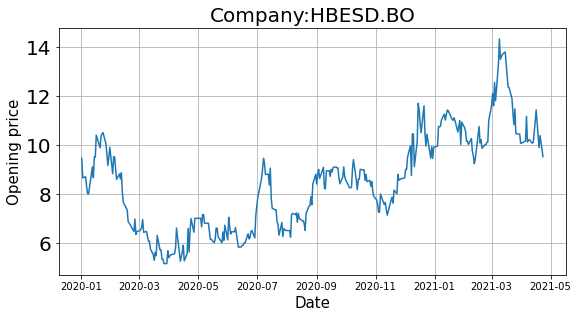

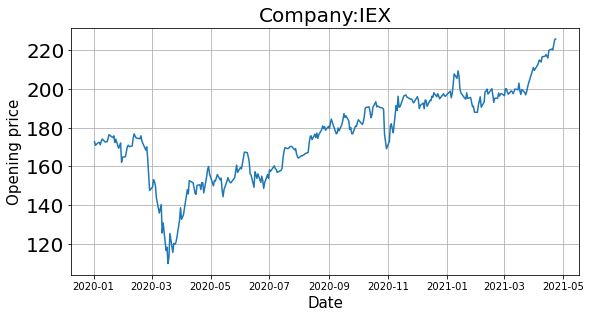

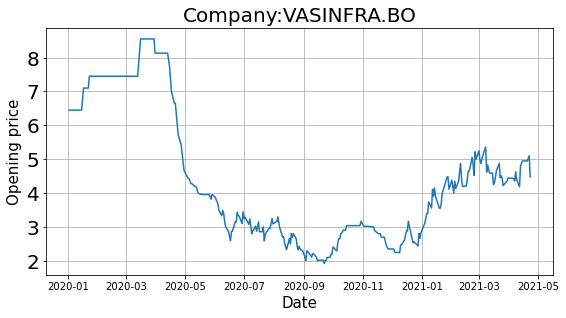

In [46]:
compare(comp1,comp2,comp3)

**Interpretation:** Above 3 plots show the trend of HBESD.BO,IEX,VASINFRA.BO companies.
All 3 companies shows decreasing trend in the opening price during 2020-03 and after that 2020-09 all 3 start rising up. 

<a id="c2"></a>
### 3.2 Date-wise movement of stocks of a particular company

In [56]:
l1=list(companies_dict.values())
l2=list(movements)
movement_dict=dict(zip(l1,l2))
movement_dict=pd.DataFrame(movement_dict)
def stock_movement(company):
    plt.figure(figsize = (20,8)) 

    plt.title('Company:'+company,fontsize = 20)

    plt.xticks(fontsize = 18)
    plt.yticks(fontsize = 20)

    plt.xlabel('Date',fontsize = 20)
    plt.ylabel('Movement',fontsize = 20)
    plt.plot(movement_dict.iloc[0:30][company])

    plt.grid(True)
    plt.show()

In [57]:
comp=input('Please insert the name of the company to check the stock movements:')


Please insert the name of the company to check the stock movements:IEX


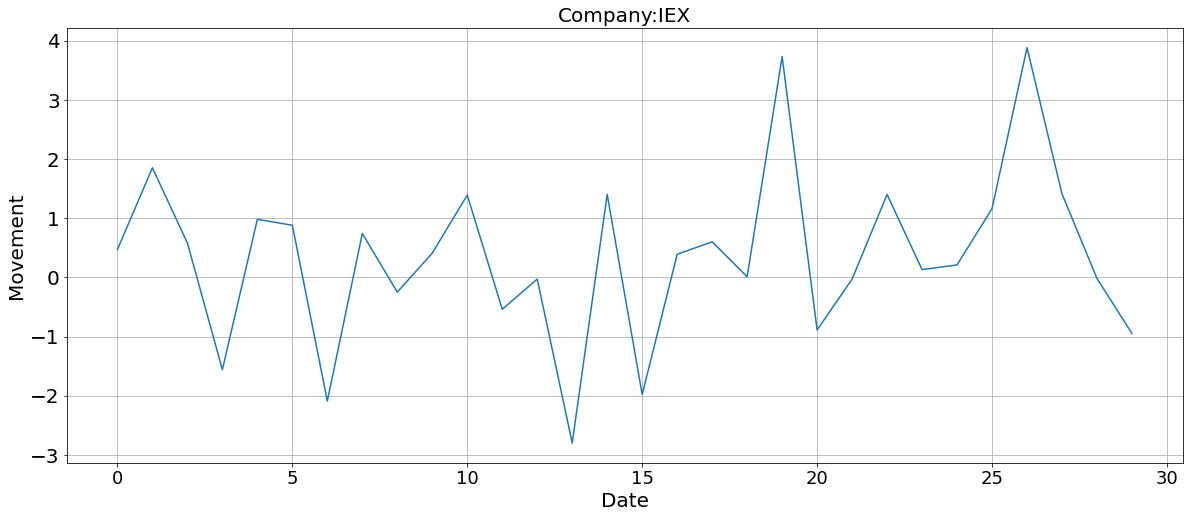

In [58]:
stock_movement(comp)

**Interpretation:** Movement of comapany IEX for 1st 30 days.

<a id="c3"></a>
### 3.3 Volume vs Date for a particular company

In [60]:
def vol_date(company):
    plt.figure(figsize = (20,10)) 

    plt.title('Company:'+company,fontsize = 20)

    plt.xticks(fontsize = 18)
    plt.yticks(fontsize = 20)

    plt.xlabel('Date',fontsize = 20)
    plt.ylabel('Volume',fontsize = 20)
    plt.plot(df['Volume'][company],label = 'Open')

    plt.grid(True)
    plt.show()

In [61]:
comp=input('Please enter the name of the company to check the volumes:')

Please enter the name of the company to check the volumes:IDEA.BO


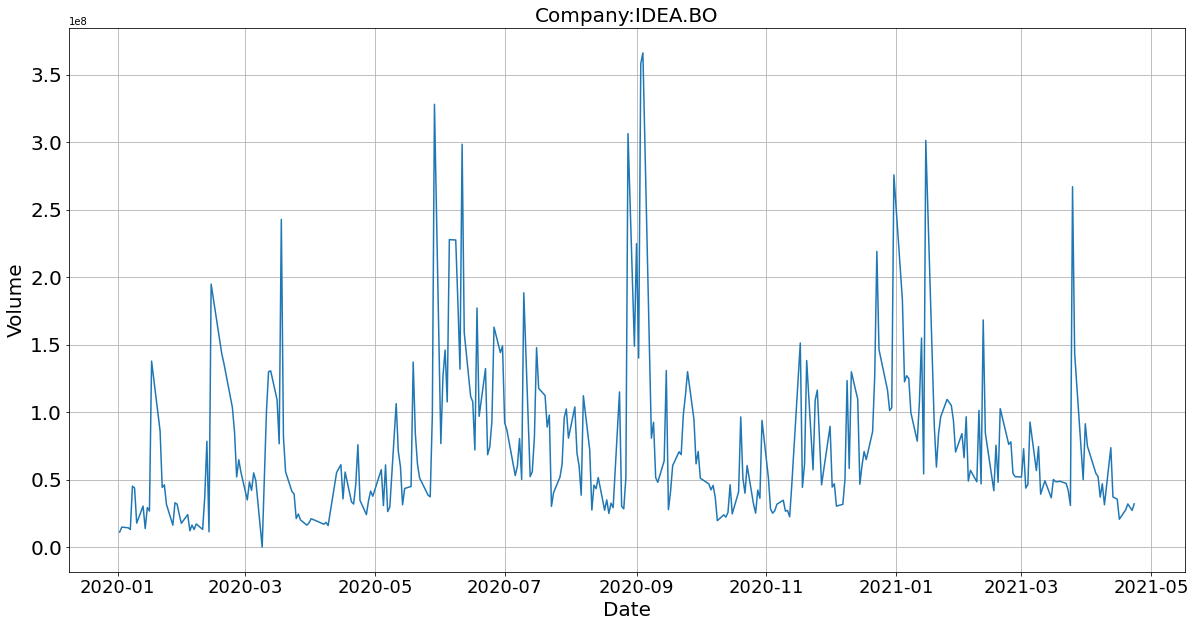

In [62]:
vol_date(comp)

**Interpretation:** No of shares trading for IDEA.BO is max on 2020-09. 

<a id="c4"></a>
### 3.4 Comparison between movements of any four companies

In [64]:
def compare_mov(*args):
    l=len(args)
    i=0
    if l<5:
        while(i<l):
            plt.figure(figsize = (20,10)) 
            plt.subplot(2,2,i+1) 
            plt.title('Company:'+args[i],fontsize = 20)
            plt.xticks(fontsize = 10)
            plt.yticks(fontsize = 20)
            plt.xlabel('Date',fontsize = 15)
            plt.ylabel('Movement',fontsize = 15)
            #plt.plot(df['Open'][args[i]])
            plt.plot(movement_dict.iloc[0:30][args[i]])
            plt.grid(True)
            i+=1 
    else:
        print('Please enter a number less than or equal to 4 to comapare')

In [65]:
comp1=input('Enter the name of the first company:')
comp2=input('Enter the name of the second company:')
comp3=input('Enter the name of the third company:')
comp4=input('Enter the name of the fourth company:')

Enter the name of the first company:HBESD.BO
Enter the name of the second company:IEX
Enter the name of the third company:JKCEMENT.BO
Enter the name of the fourth company:ACC.BO


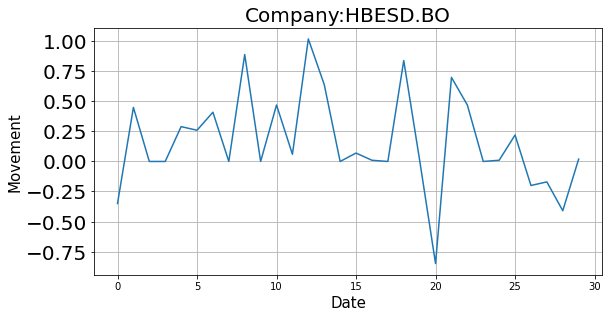

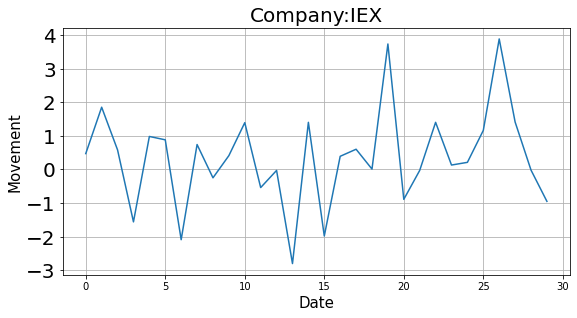

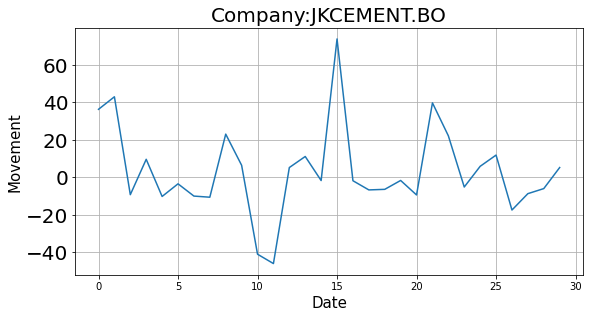

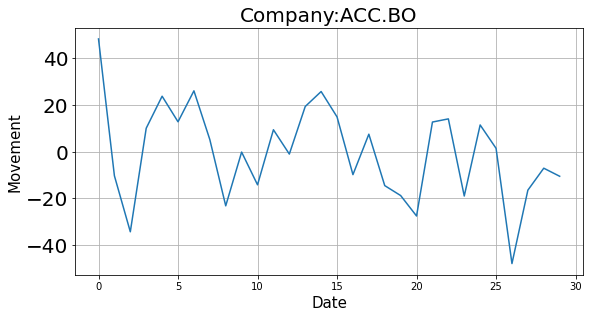

In [66]:
compare_mov(comp1,comp2,comp3,comp4)

**Interpretation:** 1st two companies i.e HBESD.BO , IEX shows common trend in movement
and last 2 companies i.e JKCEMENT.BO , ACC.BO  shows common trend in movement.

<a id="cluster"></a>
# 4. Cluster Analysis

<a id="cl1"></a>
### 4.1 Clustering based on daily growth basis i.e movement

In [67]:
stock_open = np.array(df['Open']).T 
stock_close = np.array(df['Close']).T 
movements = stock_close - stock_open

In [68]:
movements.shape

(54, 316)

In [69]:
sum_of_movement = np.sum(movements,axis=1)
net_change=sum_of_movement


In [70]:
stock_high = np.array(df['High']).T 
stock_low = np.array(df['Low']).T

sensitivity=stock_high-stock_low
sum_of_sensitivity = np.mean(sensitivity,axis=1)
avg_rr=sum_of_sensitivity

In [71]:
volume=np.array(df['Volume']).T

avg_of_volume=np.mean(volume,axis=1)

In [72]:
df_main=np.column_stack((movements,net_change,avg_rr,avg_of_volume))
df_main1=pd.DataFrame(df_main)
df_main1.shape

(54, 319)

In [1547]:
df_main1.head()

,0,1,2,3,4,5,6,7,8,9,...,309,310,311,312,313,314,315,316,317,318
0,1.000000,0.000000,-7.500000,-8.649994,23.550018,-11.149994,-8.649994,12.550018,2.450012,-0.250000,...,12.500000,-0.299988,0.549988,-9.549988,2.800049,0.849976,-11.950012,-502.100189,17.897943,1.282418e+06
1,0.040000,-0.070000,-0.020000,0.010000,0.000000,0.020000,-0.040000,-0.050000,-0.040000,0.000000,...,0.030000,-0.040000,0.000000,-0.080000,0.000000,0.000000,-0.010000,-1.330000,0.068228,6.142804e+06
2,0.090000,0.010000,-0.060000,-0.060000,0.560000,-0.260000,-0.210000,0.030000,-0.090000,-0.100000,...,0.150000,-0.020000,0.020000,-0.170000,-0.070000,0.010000,0.059999,-8.679992,0.622880,7.485095e+07
3,-0.020000,0.009999,-0.150000,0.400000,0.330000,0.080001,-0.370000,0.270000,0.330000,0.120001,...,0.550001,0.450001,0.100000,0.250000,-0.500000,-0.300000,1.150001,-17.639994,0.617089,4.491207e+05
4,3.649994,10.950012,-7.700012,-3.799988,7.149994,-6.100006,-10.799988,9.799988,5.800018,7.299988,...,15.199951,2.699951,0.099976,-5.250000,5.500000,-6.500000,1.900024,193.700211,38.031804,2.629752e+04


In [74]:
df_cl=df_main1.iloc[:,0:df_main1.shape[1]-3]
df_cl.shape

(54, 316)

#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
normalizer = StandardScaler() # Define a Normalizer
norm_movements = normalizer.fit_transform(df_cl) # Fit and transform

<a id="kmeansval"></a>
### 4.2. K-Means Clustering Validation

In [80]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

ssd=[];score=[]
for k in range(2,10):
    Kmeans=KMeans(n_clusters=k,random_state=6)
    Kmeans.fit(norm_movements)
    ssd.append(Kmeans.inertia_)
    ss=silhouette_score(norm_movements,Kmeans.labels_)
    score.append(ss)

<a id="elbow"></a>
### 4.2.1 Elbow Plot

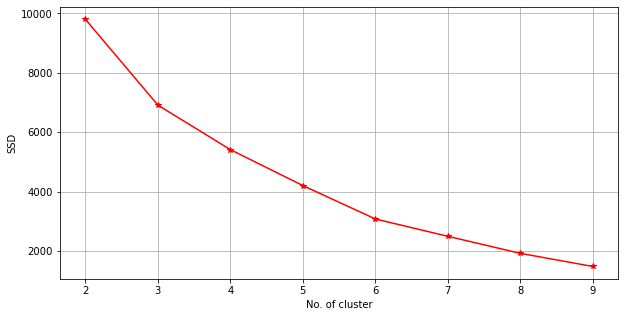

In [81]:
# elbow plot
plt.rcParams['figure.figsize']=[10,5]
plt.plot(range(2,10),ssd,marker='*',color='r')
plt.xlabel('No. of cluster')
plt.ylabel('SSD')
plt.grid(True)
plt.show()

<a id="silhouette"></a>
### 4.2.2 silhouette score for Different Clusters

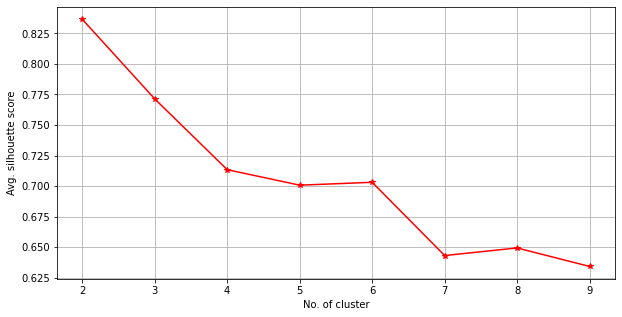

In [82]:
# avg silhouette score
plt.rcParams['figure.figsize']=[10,5]
plt.plot(range(2,10),score,marker='*',color='r')
plt.xlabel('No. of cluster')
plt.ylabel('Avg. silhouette score')
plt.grid(True)
plt.show()

**Interpretation:** From above elbow plot and silhouette score plot we observe that elbow is occuring at cluster no 3 and max silhouette score is comming at 2 followed by 3. So the best no cluster from above analysis is 3.

<a id="kmeans"></a>
### 4.3 KMeans Clustering with 3 Clusters

In [83]:
# Define a normalizer
normalizer = Normalizer()
# Create Kmeans model
kmeans = KMeans(n_clusters = 3,max_iter = 1000,random_state=6)
# Make a pipeline chaining normalizer and kmeans
pipeline = make_pipeline(normalizer,kmeans)
# Fit pipeline to daily stock movements
pipeline.fit(df_cl)
labels = pipeline.predict(df_cl)

In [84]:
df_main2=df_main1.iloc[:,[df_main1.shape[1]-3,df_main1.shape[1]-2,df_main1.shape[1]-1]]
df_main2['labels']=labels
df_main2.head()

,316,317,318,labels
0,-502.100189,17.897943,1.282418e+06,2
1,-1.330000,0.068228,6.142804e+06,1
2,-8.679992,0.622880,7.485095e+07,1
3,-17.639994,0.617089,4.491207e+05,1
4,193.700211,38.031804,2.629752e+04,1


In [85]:
mydict1={df_main1.shape[1]-3:'Net_movement',df_main1.shape[1]-2:'Avg_Risk&Return',df_main1.shape[1]-1:'Avg_volume'}
df_main2.rename(columns=mydict1,inplace=True)
df_main2.head()

,Net_movement,Avg_Risk&Return,Avg_volume,labels
0,-502.100189,17.897943,1.282418e+06,2
1,-1.330000,0.068228,6.142804e+06,1
2,-8.679992,0.622880,7.485095e+07,1
3,-17.639994,0.617089,4.491207e+05,1
4,193.700211,38.031804,2.629752e+04,1


In [86]:
comp_list=df['High'].columns

In [87]:
df_main2['companies']=comp_list
df_main2.sort_values('Net_movement',ascending=False).head()

,Net_movement,Avg_Risk&Return,Avg_volume,labels,companies
22,349.950104,10.322785,987.765823,0,TCIDEVELOP.BO
4,193.700211,38.031804,26297.518987,1,TATACOMM.BO
25,148.199768,20.723577,69023.018987,2,ADANITRANS.BO
18,38.420004,0.498576,3172.952532,0,HBESD.BO
28,27.509895,4.164905,475575.316456,0,IEX


In [88]:
df_main2.shape

(54, 5)

In [89]:
df_main2['labels'].value_counts()

2    24
1    18
0    12
Name: labels, dtype: int64

<a id="cp"></a>
### 5. Clusters profiling

In [90]:
df_main2.groupby('labels').agg('mean')

,Net_movement,Avg_Risk&Return,Avg_volume
labels,,,
0,28.442501,1.413307,7.950636e+04
1,-100.062211,5.171299,6.069685e+06
2,-277.362947,17.911026,2.306857e+06


**Interpretation:**<br> **cluster 0 -->** is best among all based on net change on any particular day also avg volume of share trading is comparable to max.<br>**cluster 1 -->** is best among all based on popularity and no of share trading on a particular day.<br>**cluster 2 -->** is most volatile among all the cluster based on risk and return but companies in this cluster is having very bad net_movement.

In [ ]:
df3=df_main2.copy()

<a id="cp2"></a>
### 5.1 Cluster-0

In [92]:
df3[df3['labels']==0].sort_values(['Net_movement','Avg_Risk&Return'],ascending=False)

,Net_movement,Avg_Risk&Return,Avg_volume,labels,companies
22,349.950104,10.322785,987.765823,0,TCIDEVELOP.BO
18,38.420004,0.498576,3172.952532,0,HBESD.BO
28,27.509895,4.164905,475575.316456,0,IEX
23,4.030000,0.081234,1948.155063,0,VASINFRA.BO
27,2.349999,0.013892,364.844937,0,GITARENEW.BO
16,-0.250000,0.035190,1078.110759,0,CRANEINFRA.BO
19,-1.500000,0.016804,6727.490506,0,KCLINFRA.BO
42,-2.300000,0.071994,56522.588608,0,BURNPUR.NS
29,-4.409998,0.208829,17893.632911,0,INDOWIND.BO
17,-6.180000,0.227595,295824.683544,0,ETTX


**Interpretation:**<br> **cluster 0-->** for user who wants to get  return with low risk and return in less time.

<a id="cp3"></a>
### 5.2 Cluster-1

In [93]:
df3[df3['labels']==1].sort_values(['Avg_volume','Net_movement','Avg_Risk&Return'],ascending=False)

,Net_movement,Avg_Risk&Return,Avg_volume,labels,companies
2,-8.679992,0.622880,7.485095e+07,1,IDEA.BO
38,-4.700001,0.148892,1.930159e+07,1,RPOWER.NS
1,-1.330000,0.068228,6.142804e+06,1,RCOM.BO
30,-11.349960,3.020570,3.324632e+06,1,JSWENERGY.NS
35,-6.049999,0.103956,1.797541e+06,1,GREENPOWER.NS
36,-13.199999,0.802532,1.214259e+06,1,PFS.NS
12,-6.720003,0.324905,1.028771e+06,1,TTML.BO
9,-25.219984,1.039715,8.735883e+05,1,HFCL.BO
3,-17.639994,0.617089,4.491207e+05,1,MTNL.BO
7,-189.749947,4.763133,1.461388e+05,1,ITI.BO


**Interpretation:**<br> **cluster 1 -->** for user who wants to go with high risk and return (prefer for those who wants to take risk and earn more and investing for short term)

<a id="cp4"></a>
### 5.3 Cluster-2

In [94]:
df3[df3['labels']==2].sort_values(['Net_movement','Avg_Risk&Return'],ascending=True)

,Net_movement,Avg_Risk&Return,Avg_volume,labels,companies
45,-2049.799927,70.563759,8.959981e+03,2,JKCEMENT.BO
39,-965.451294,47.303955,4.503341e+04,2,ACC.BO
26,-760.449799,22.557597,2.161677e+04,2,CESC.BO
53,-612.449707,145.498738,2.649304e+04,2,ULTRACEMCO.BO
0,-502.100189,17.897943,1.282418e+06,2,BHARTIARTL.BO
43,-489.650192,14.436235,6.372763e+03,2,DECCANCE.BO
50,-306.399475,27.305381,2.683774e+04,2,RAMCOCEM.BO
46,-295.600128,12.475475,2.384530e+04,2,JKLAKSHMI.BO
44,-204.400101,11.946044,1.018274e+04,2,EVERESTIND.BO
51,-118.650009,3.710443,2.712309e+04,2,STARCEMENT.BO


**Interpretation:**<br> **cluster 2-->** for user who wants to go with large of no of share trading may be due to hold for long time or may be per share price is low.

<AxesSubplot:xlabel='Net_movement', ylabel='Avg_Risk&Return'>

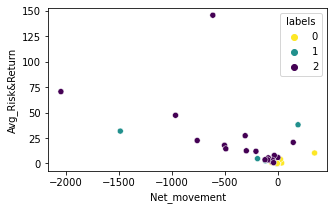

In [95]:
import seaborn as sns
plt.rcParams['figure.figsize']=[5,3]
sns.scatterplot(x=df3['Net_movement'],y=df3['Avg_Risk&Return'],hue=df3['labels'],palette='viridis_r')

**Interpretation:**<br>

In [ ]:
# cluster 1 for user who wants to go with large of no of share trading may be due to hold for long time or may be per share price is low.
# cluster 0 for user who wants to get more return with less risk and return in less time.
# cluster 2 for user who wants to go with high risk and return (prefer for those who wants to take risk and earn more
# investing for short term)

<a id="dbscan"></a>
### 6.  DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

In [1573]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
norm_movements = ss.fit_transform(df_cl) 

In [1574]:
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=4)
nn = nn.fit(norm_movements)
distances, indices = nn.kneighbors(norm_movements)

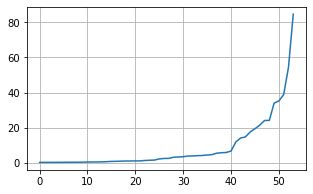

In [1575]:
distances = distances[:,3]
distances = np.sort(distances, axis=0)
plt.plot(distances)
plt.grid(True)
plt.show()

In [1576]:
norm_movements.shape

(54, 316)

In [1577]:
from sklearn.cluster import DBSCAN
dbscan2 = DBSCAN(eps=18, min_samples=15)
dbscan2.fit(norm_movements)

DBSCAN(eps=18, min_samples=15)

In [1578]:
df_main_db=np.column_stack((movements,net_change,avg_rr,avg_of_volume))
df_main1_db=pd.DataFrame(df_main_db)
df_main1_db.shape

(54, 319)

In [1579]:
df_main2_db=df_main1_db.iloc[:,[df_main1_db.shape[1]-3,df_main1_db.shape[1]-2,df_main1_db.shape[1]-1]]
df_main2_db['labels']=dbscan2.labels_
df_main2_db.head()

,316,317,318,labels
0,-502.100189,17.897943,1.282418e+06,-1
1,-1.330000,0.068228,6.142804e+06,0
2,-8.679992,0.622880,7.485095e+07,0
3,-17.639994,0.617089,4.491207e+05,0
4,193.700211,38.031804,2.629752e+04,-1


In [1580]:
mydict1_db={df_main1_db.shape[1]-3:'Net_movement',df_main1_db.shape[1]-2:'Avg_Risk&Return',df_main1_db.shape[1]-1:'Avg_volume'}
df_main2_db.rename(columns=mydict1_db,inplace=True)
df_main2_db.head()

,Net_movement,Avg_Risk&Return,Avg_volume,labels
0,-502.100189,17.897943,1.282418e+06,-1
1,-1.330000,0.068228,6.142804e+06,0
2,-8.679992,0.622880,7.485095e+07,0
3,-17.639994,0.617089,4.491207e+05,0
4,193.700211,38.031804,2.629752e+04,-1


In [1581]:
comp_list=df['High'].columns

df_main2_db['companies']=comp_list
df_main2_db.sort_values('Net_movement',ascending=False).head()

,Net_movement,Avg_Risk&Return,Avg_volume,labels,companies
22,349.950104,10.322785,987.765823,0,TCIDEVELOP.BO
4,193.700211,38.031804,26297.518987,-1,TATACOMM.BO
25,148.199768,20.723577,69023.018987,-1,ADANITRANS.BO
18,38.420004,0.498576,3172.952532,0,HBESD.BO
28,27.509895,4.164905,475575.316456,0,IEX


In [1582]:
df_main2_db['labels'].value_counts()

 0    45
-1     9
Name: labels, dtype: int64

In [1583]:
df_main2_db[df_main2_db['labels']==-1]

,Net_movement,Avg_Risk&Return,Avg_volume,labels,companies
0,-502.100189,17.897943,1.282418e+06,-1,BHARTIARTL.BO
4,193.700211,38.031804,2.629752e+04,-1,TATACOMM.BO
5,-1487.800171,31.796679,2.309054e+03,-1,VINDHYATEL.BO
25,148.199768,20.723577,6.902302e+04,-1,ADANITRANS.BO
26,-760.449799,22.557597,2.161677e+04,-1,CESC.BO
39,-965.451294,47.303955,4.503341e+04,-1,ACC.BO
45,-2049.799927,70.563759,8.959981e+03,-1,JKCEMENT.BO
50,-306.399475,27.305381,2.683774e+04,-1,RAMCOCEM.BO
53,-612.449707,145.498738,2.649304e+04,-1,ULTRACEMCO.BO


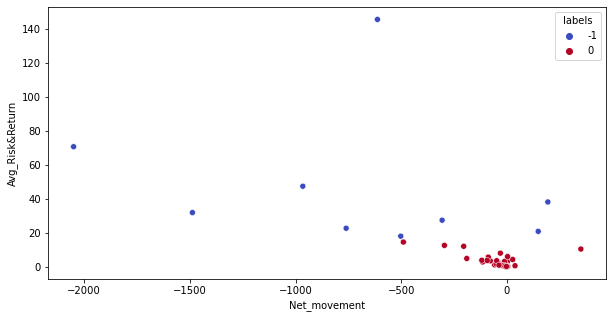

In [1591]:
plt.figure(figsize=(10, 5))
sns.scatterplot(df_main2_db['Net_movement'], df_main2_db['Avg_Risk&Return'],hue=df_main2_db['labels'],palette='coolwarm' )
plt.show()

**Interpretation:**<br> There are Total of 9 out of 54 companies whcih are outliers as they have high Risk and Return but
after performing dbscan we observe that out of 54 companies 9 companies falls as outliers since their risk & return is good and popularity is moderate where as movement of 9 companies are bad.

<a id="rec"></a>
### 7. Recommendation Based on Cluster Analysis

In [116]:
d2=pd.DataFrame(columns=df3.columns)
i=0
while(i<df3['labels'].nunique()):
    d1=df3[df3['labels']==i].sort_values(by=['Avg_Risk&Return','Net_movement'],ascending=False).head(4)
    d2=d2.append(d1,ignore_index=True)
    i+=1

In [117]:
d2

,Net_movement,Avg_Risk&Return,Avg_volume,labels,companies
0,349.950104,10.322785,9.877658e+02,0,TCIDEVELOP.BO
1,27.509895,4.164905,4.755753e+05,0,IEX
2,-57.969993,0.999335,7.609263e+03,0,SUPREME.BO
3,38.420004,0.498576,3.172953e+03,0,HBESD.BO
4,193.700211,38.031804,2.629752e+04,1,TATACOMM.BO
5,-1487.800171,31.796679,2.309054e+03,1,VINDHYATEL.BO
6,-189.749947,4.763133,1.461388e+05,1,ITI.BO
7,-11.349960,3.020570,3.324632e+06,1,JSWENERGY.NS
8,-612.449707,145.498738,2.649304e+04,2,ULTRACEMCO.BO
9,-2049.799927,70.563759,8.959981e+03,2,JKCEMENT.BO


**---END---**